In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [4]:

# Load dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')


In [5]:

# Initial inspection
print(df.shape)
print(df.head())
print(df.columns)
print(df.dtypes)
print(df.info())
print(df.describe())

# Check for missing values and duplicates
print(df.isnull().sum())
duplicates = df.duplicated()
print("Duplicates:", duplicates.sum())

(4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0              

In [6]:

# Clean column names
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace("-", "_")
)

# Detect and remove outliers using Z-score
from scipy.stats import zscore

numerical_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                  'residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value', 'bank_asset_value']

z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")
df = df[~outliers]
print(f"Data shape after removing outliers: {df.shape}")




Number of outliers detected: 33
Data shape after removing outliers: (4236, 13)


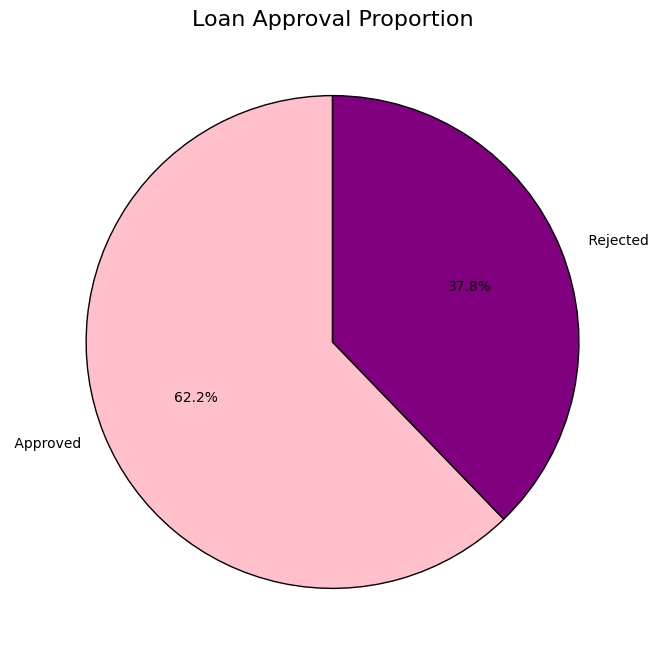

In [7]:
# Pie chart: Loan status
plt.figure(figsize=(8, 8))
loan_status_counts = df['loan_status'].value_counts()
loan_status_counts.plot.pie(autopct='%1.1f%%', colors=['pink','purple'],
                            startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Loan Approval Proportion', fontsize=16)
plt.ylabel('')
plt.show()

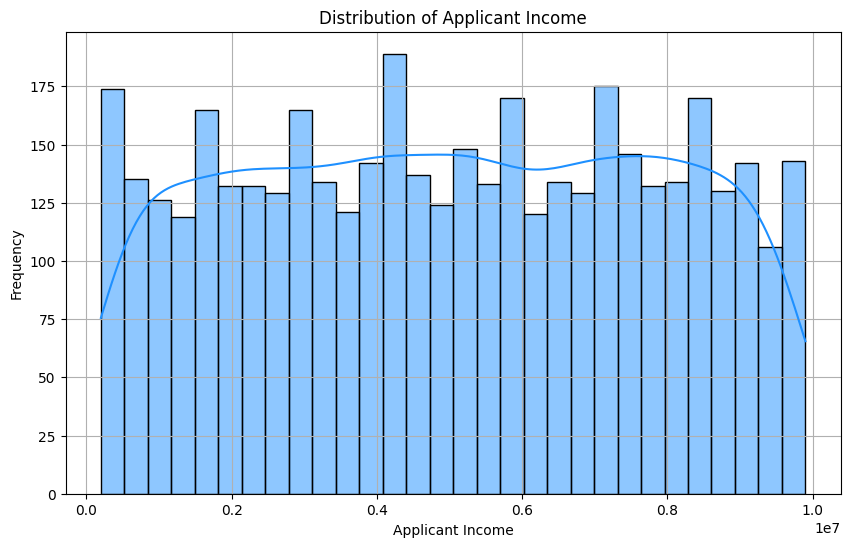

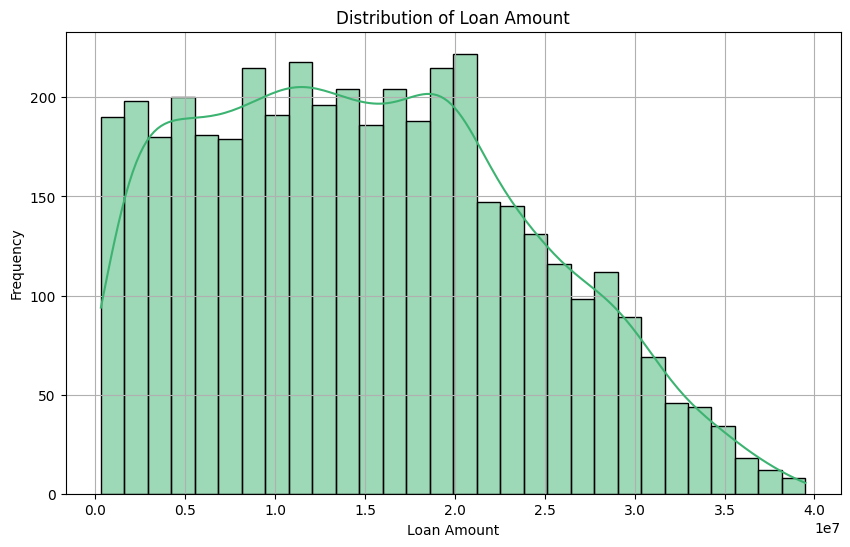

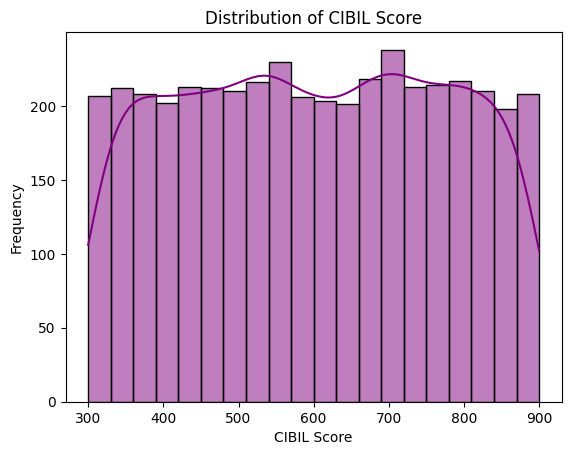

In [8]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['income_annum'], kde=True, color='dodgerblue', bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], kde=True, color='mediumseagreen', bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.histplot(df['cibil_score'], kde=True, color="purple", bins=20)
plt.title('Distribution of CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

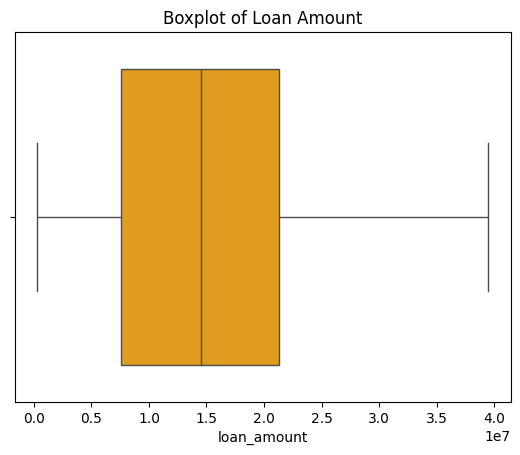

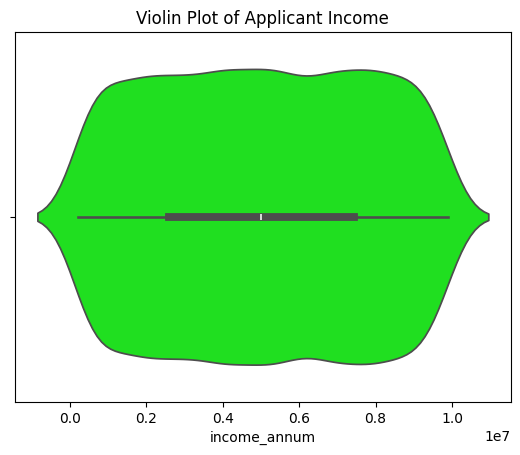

In [9]:
# Boxplot & Violin plot
sns.boxplot(x='loan_amount', data=df, color='orange')
plt.title('Boxplot of Loan Amount')
plt.show()

sns.violinplot(x='income_annum', data=df, color='lime')
plt.title('Violin Plot of Applicant Income')
plt.show()

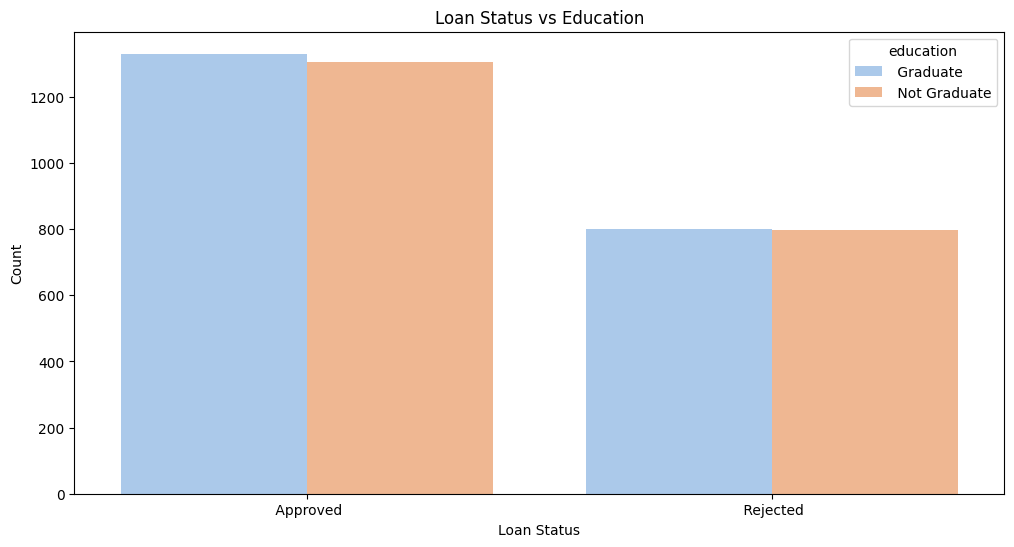

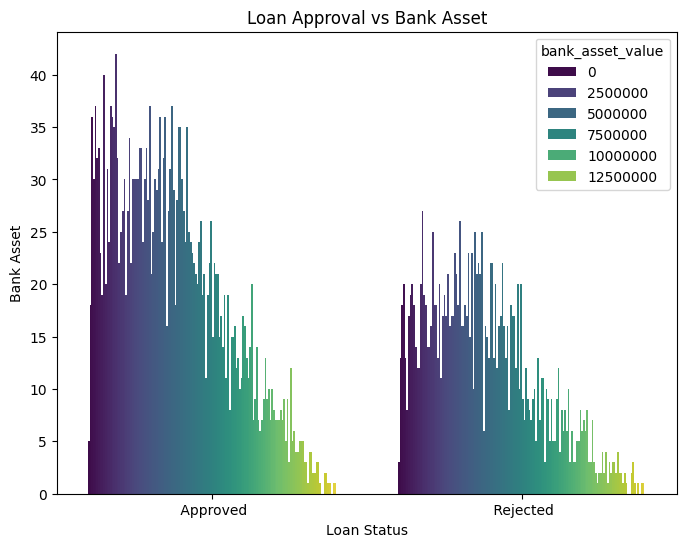

In [10]:
# Count plots
plt.figure(figsize=(12, 6))
sns.countplot(x='loan_status', hue='education', data=df, palette="pastel")
plt.title('Loan Status vs Education')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', hue='bank_asset_value', data=df, palette='viridis')
plt.title('Loan Approval vs Bank Asset')
plt.xlabel('Loan Status')
plt.ylabel('Bank Asset')
plt.show()

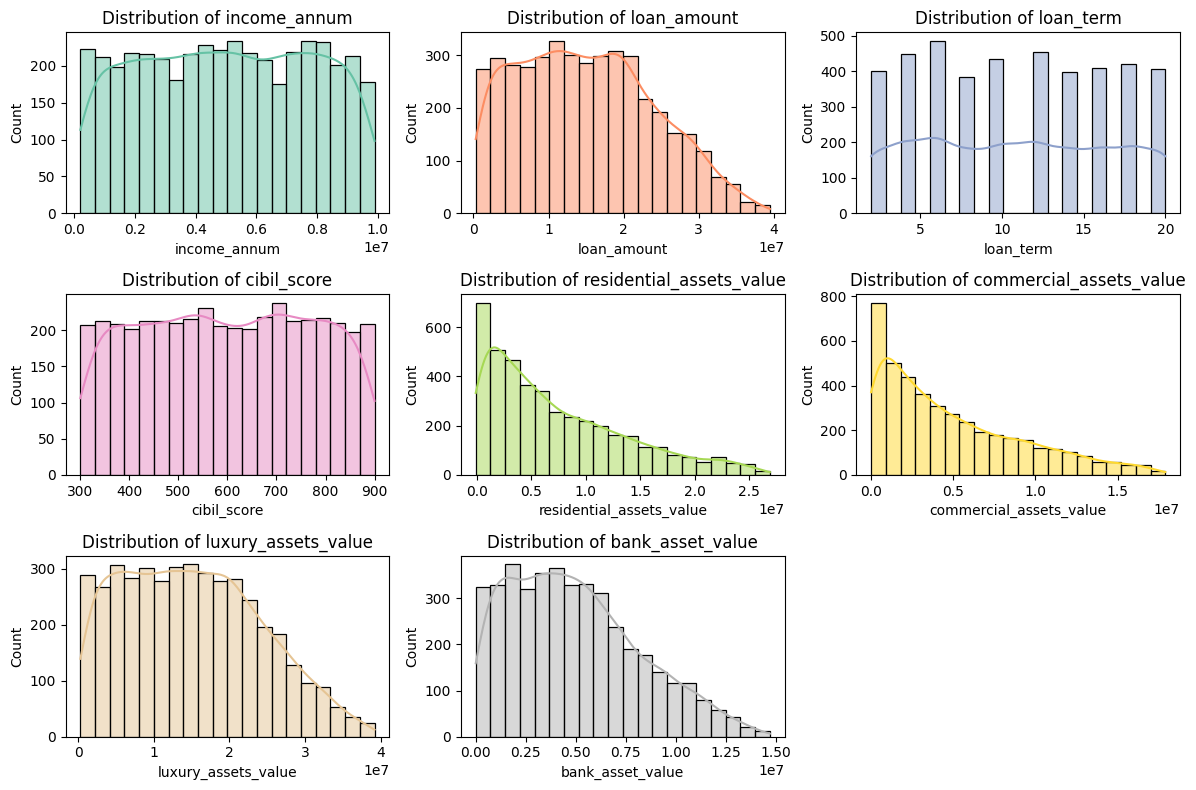

In [11]:
# Histograms of all numeric columns
numeric_columns = numerical_cols
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color=sns.color_palette("Set2")[i-1])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

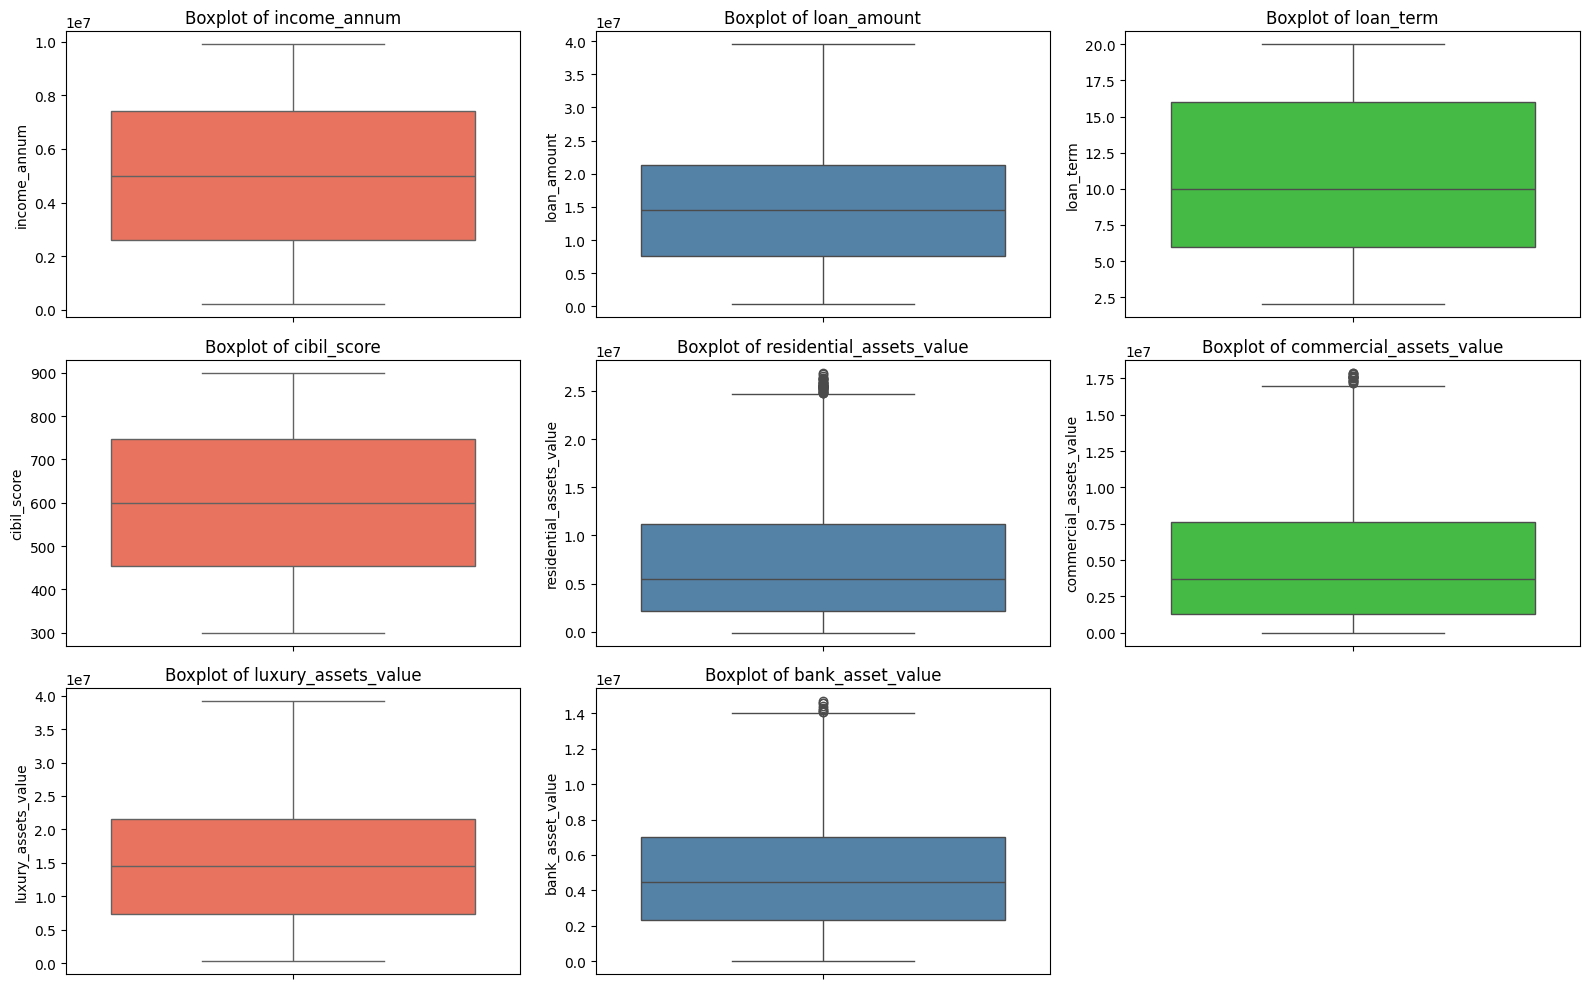

In [12]:
# Boxplots
def plot_boxplots(df, columns):
    custom_palette = ["#FF6347", "#4682B4", "#32CD32"]
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=df[col], color=custom_palette[i % 3])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

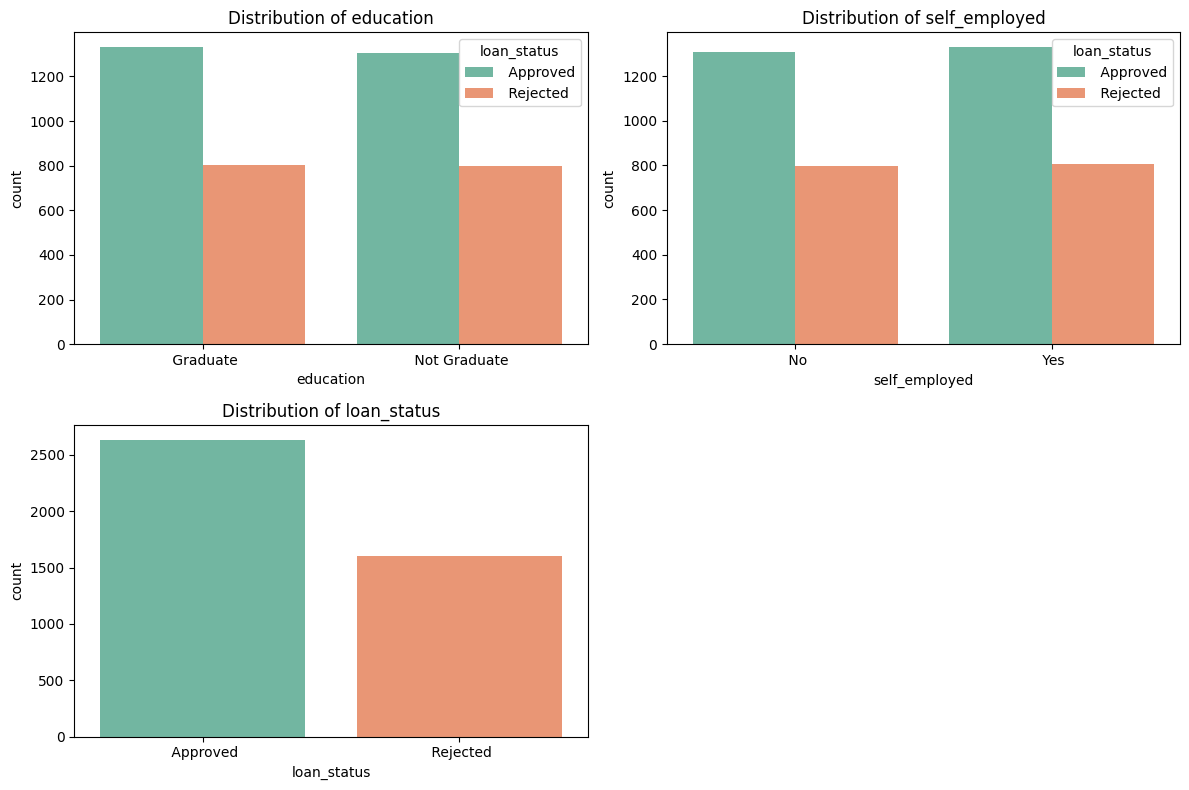

In [13]:
# Bar plots for categorical variables
categorical_columns = ['education', 'self_employed', 'loan_status']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue="loan_status", palette="Set2")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



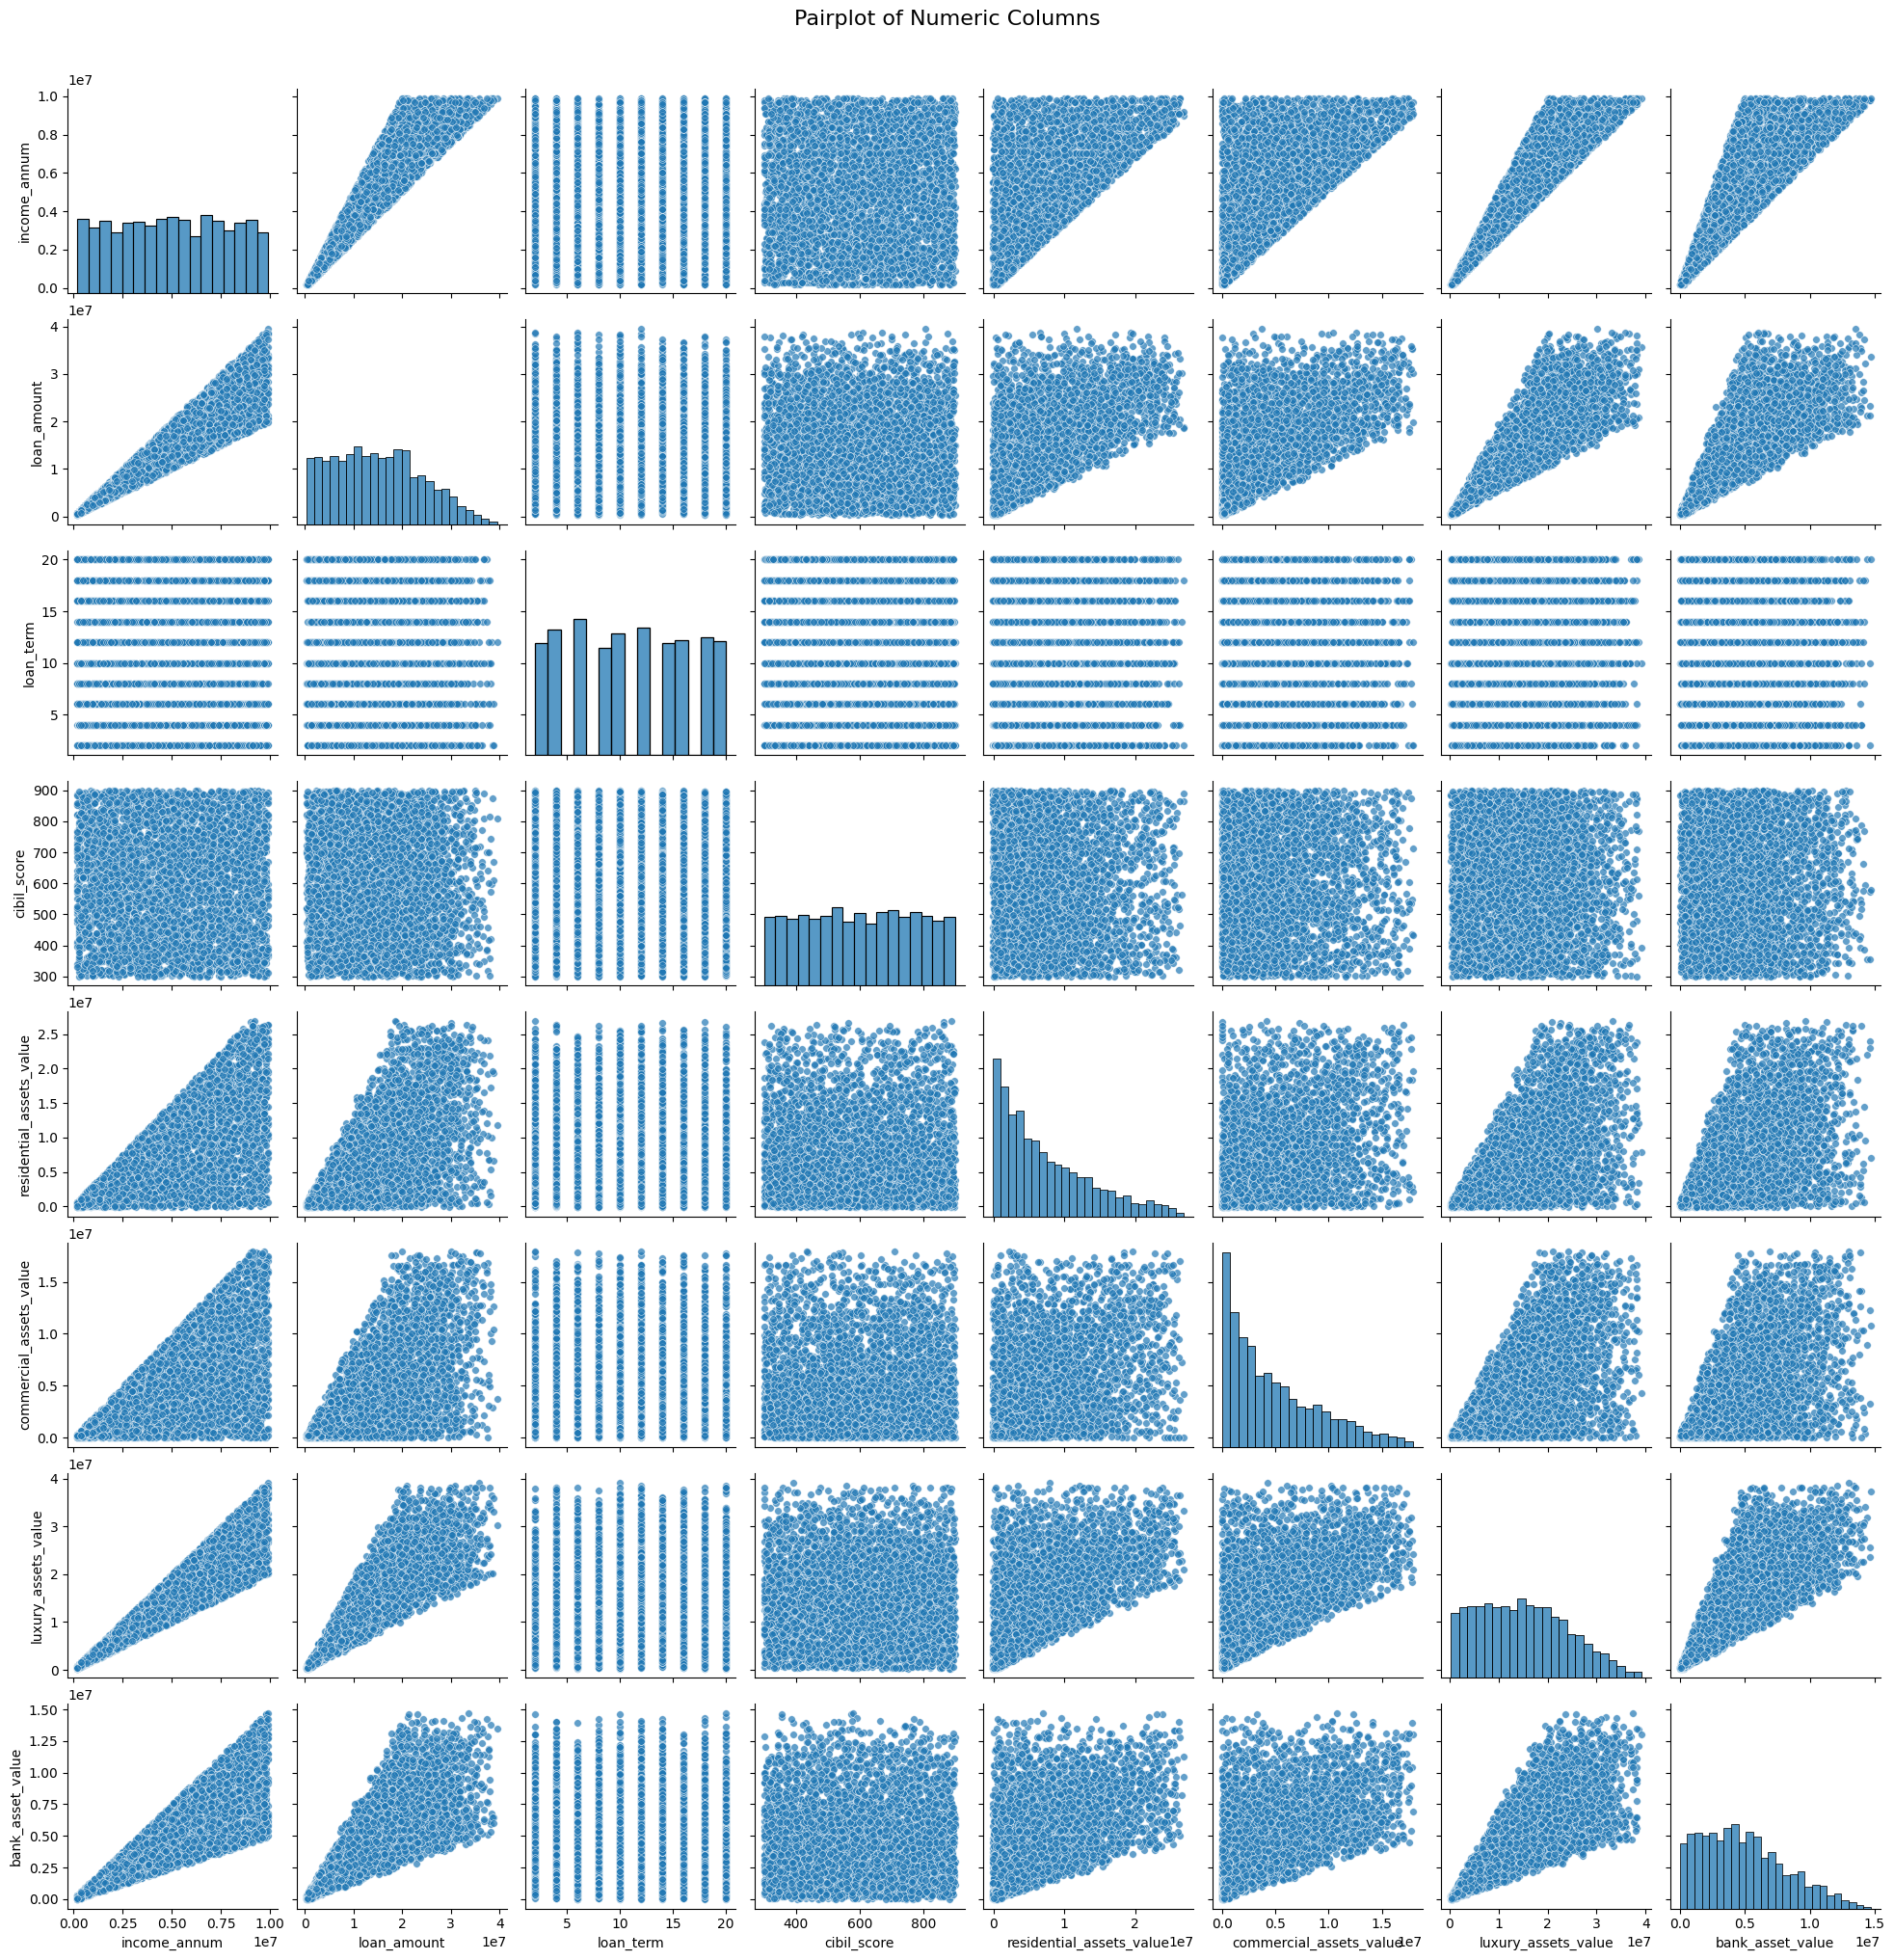

In [14]:
# Pairplot of numeric variables
sns.pairplot(df[numeric_columns], plot_kws={'alpha': 0.7, 's': 30})
plt.suptitle('Pairplot of Numeric Columns', fontsize=16, y=1.02)
plt.show()

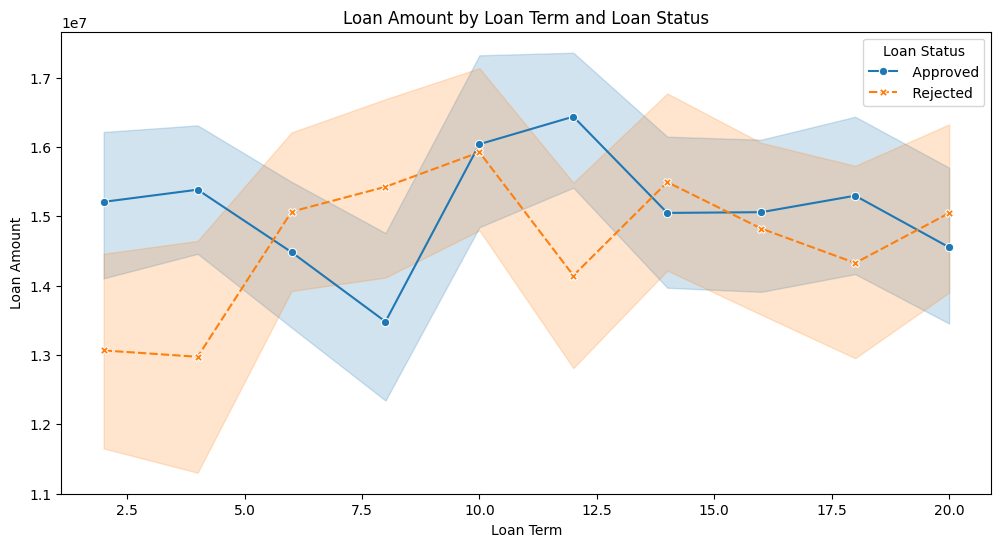

In [15]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='loan_term', y='loan_amount', hue='loan_status', style='loan_status', markers=True)
plt.title('Loan Amount by Loan Term and Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

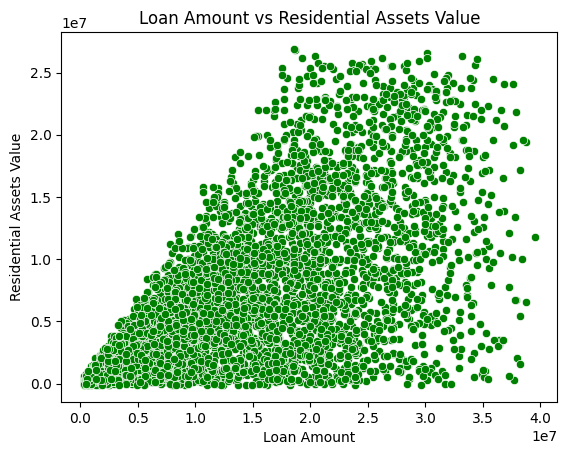

In [16]:
# Scatter plots
sns.scatterplot(x='loan_amount', y='residential_assets_value', data=df, color="green")
plt.title('Loan Amount vs Residential Assets Value')
plt.xlabel('Loan Amount')
plt.ylabel('Residential Assets Value')
plt.show()

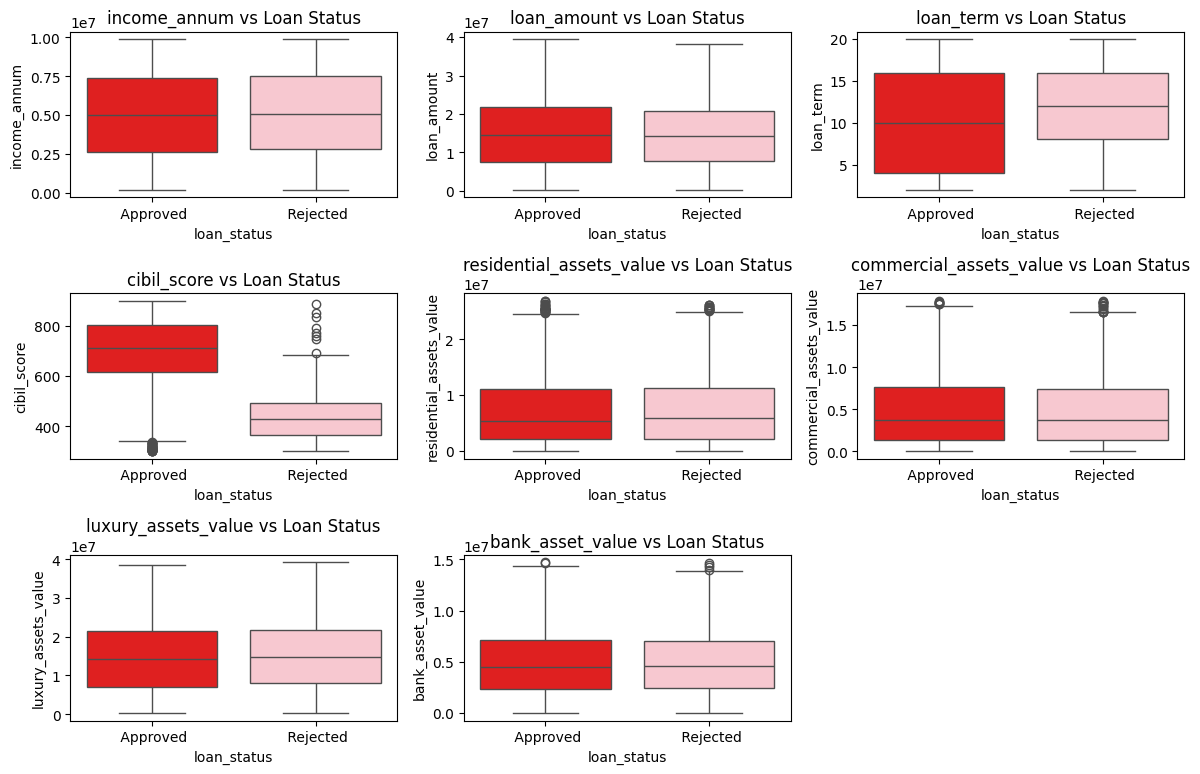

In [24]:
# Boxplots grouped by loan status
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=column, data=df, palette=['red','pink'],hue='loan_status')
    plt.title(f'{column} vs Loan Status')
plt.tight_layout()
plt.show()

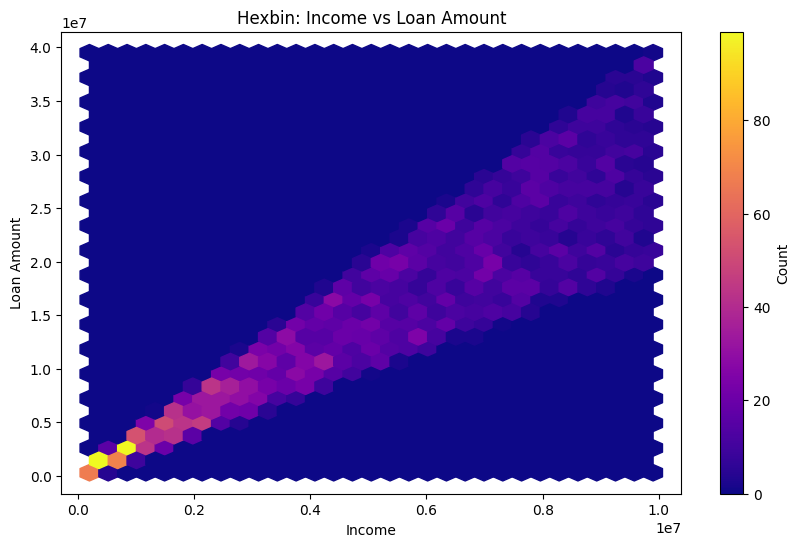

In [25]:
# Hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(df['income_annum'], df['loan_amount'], gridsize=30, cmap='plasma')
plt.colorbar(label='Count')
plt.title('Hexbin: Income vs Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()


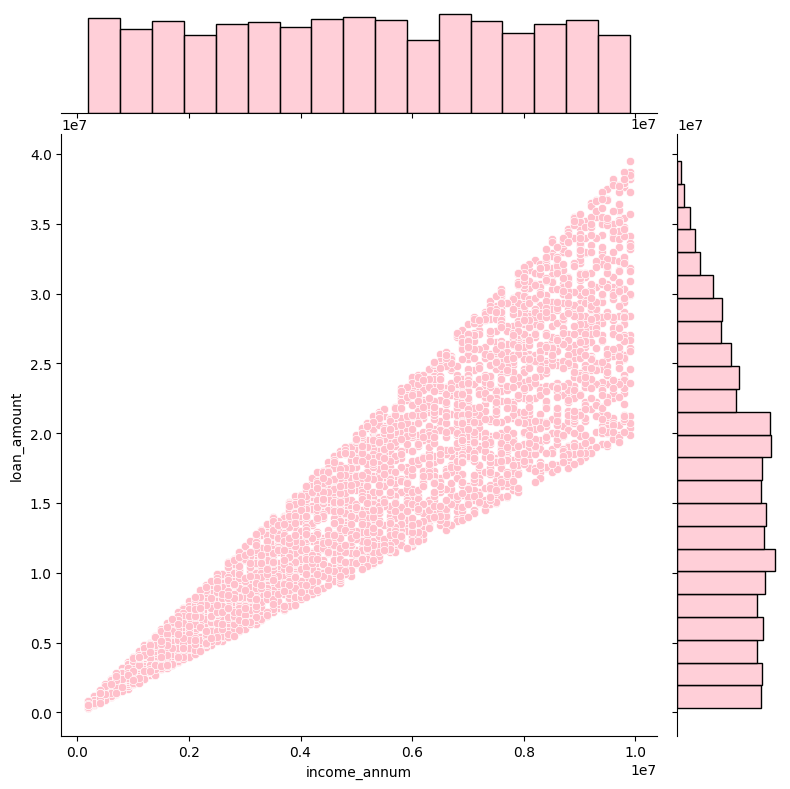

In [26]:
# Joint plot
sns.jointplot(x='income_annum', y='loan_amount', data=df, kind='scatter', color='pink', height=8)
plt.show()

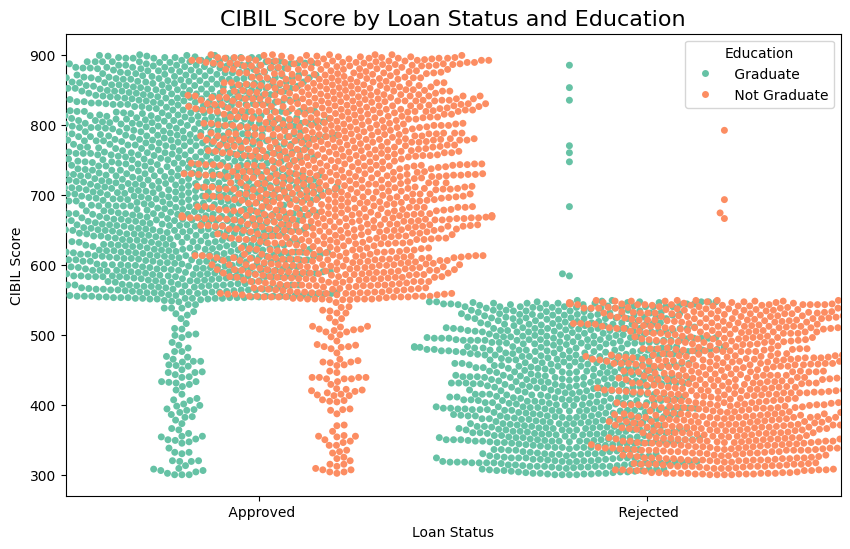

In [28]:
# Swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='loan_status', y='cibil_score', data=df, hue='education', palette='Set2', dodge=True)
plt.title('CIBIL Score by Loan Status and Education', fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.legend(title='Education')
plt.show()


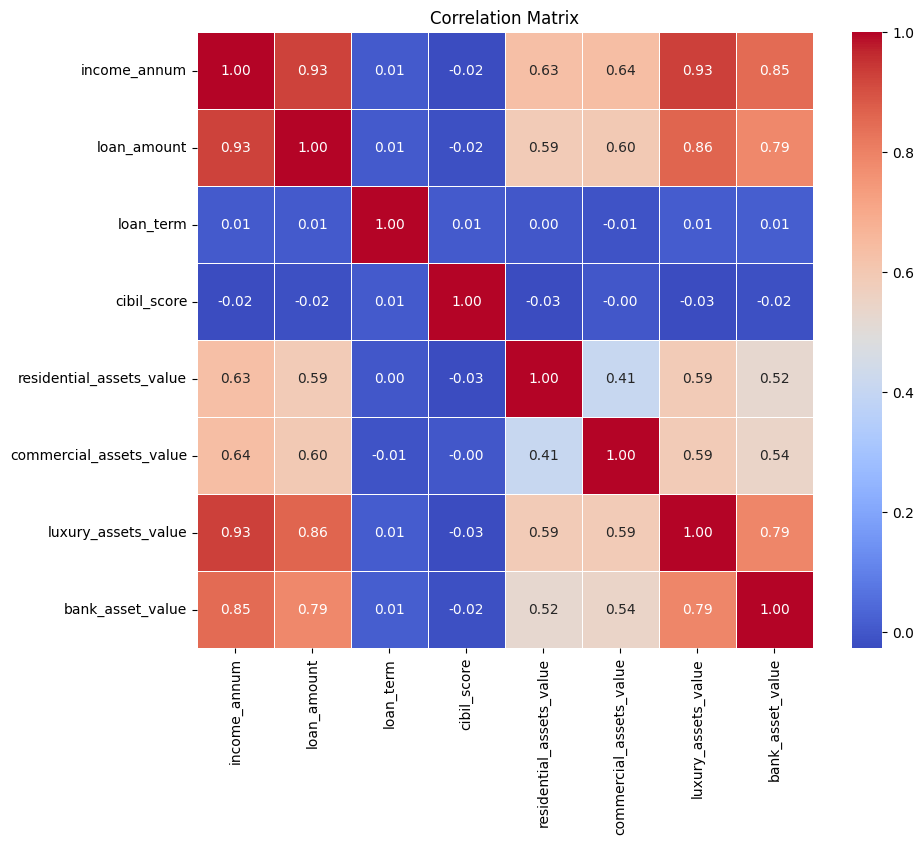

In [29]:

# Correlation heatmap
corr = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()


In [30]:
# Summary statistics
print("Mean:", df['loan_amount'].mean())
print("Median:", df['loan_amount'].median())
print("Mode:", df['loan_amount'].mode())
print("Standard Deviation:", df['loan_amount'].std())
print("Variance:", df['loan_amount'].var())
print("Skewness:", df['loan_amount'].skew())
print("Kurtosis:", df['loan_amount'].kurt())
print("Sum:", df['loan_amount'].sum())
print("Min:", df['loan_amount'].min())
print("Max:", df['loan_amount'].max())

Mean: 15021718.602455147
Median: 14500000.0
Mode: 0    10600000
Name: loan_amount, dtype: int64
Standard Deviation: 8976516.152746184
Variance: 80577842240513.16
Skewness: 0.31017228193780183
Kurtosis: -0.7389193921481594
Sum: 63632000000
Min: 300000
Max: 39500000


Mann-Whitney U test:
Statistic: 8226348.5
P-value: 3.5089070967349034e-11


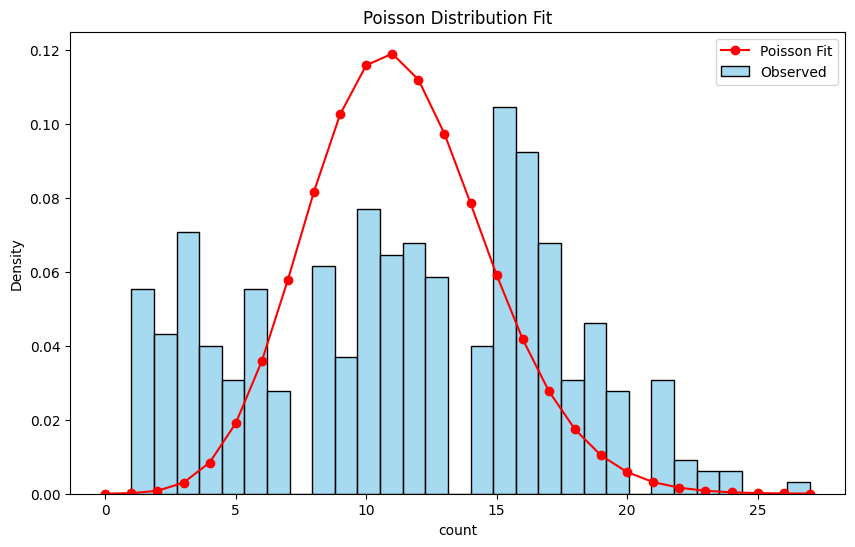

In [31]:
# Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(df.iloc[:, 9], df.iloc[:, 11])
print("Mann-Whitney U test:")
print("Statistic:", u_stat)
print("P-value:", p_value)

# Poisson distribution fit
feature_counts = df['loan_amount'].value_counts()
lambda_poisson = feature_counts.mean()
x = np.arange(0, feature_counts.max() + 1)
poisson_pmf = stats.poisson.pmf(x, lambda_poisson)
plt.figure(figsize=(10, 6))
sns.histplot(feature_counts, bins=30, stat='density', color='skyblue', label='Observed')
plt.plot(x, poisson_pmf, 'ro-', label='Poisson Fit')
plt.legend()
plt.title('Poisson Distribution Fit')
plt.show()


Evaluating Logistic Regression
Logistic Regression Mean CV Accuracy: 0.92
Logistic Regression Accuracy: 0.90
Logistic Regression ROC AUC: 0.8926
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       765
           1       0.87      0.87      0.87       506

    accuracy                           0.90      1271
   macro avg       0.89      0.89      0.89      1271
weighted avg       0.90      0.90      0.90      1271



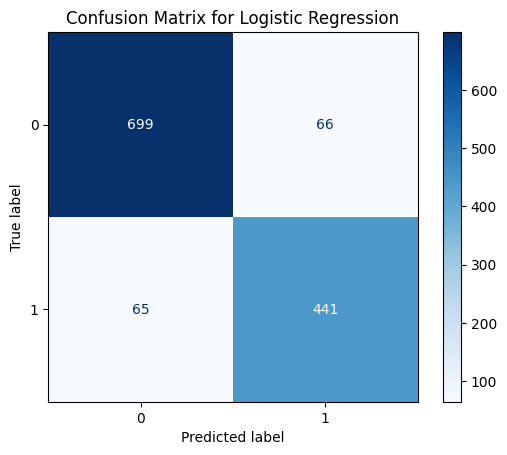

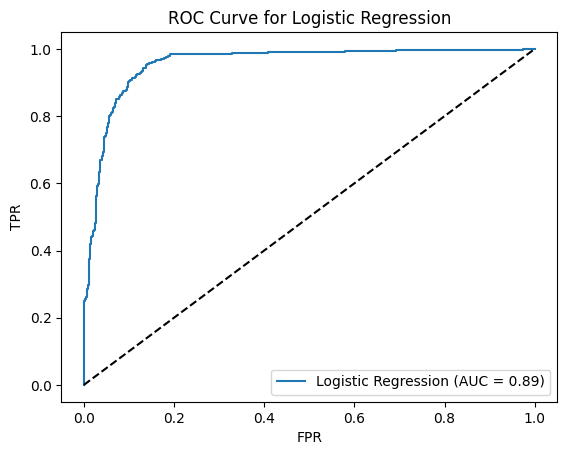


Evaluating Decision Tree
Decision Tree Mean CV Accuracy: 0.98
Decision Tree Accuracy: 0.97
Decision Tree ROC AUC: 0.9691
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       765
           1       0.96      0.96      0.96       506

    accuracy                           0.97      1271
   macro avg       0.97      0.97      0.97      1271
weighted avg       0.97      0.97      0.97      1271



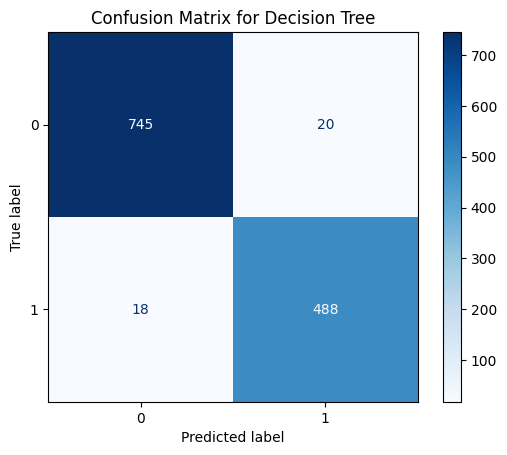

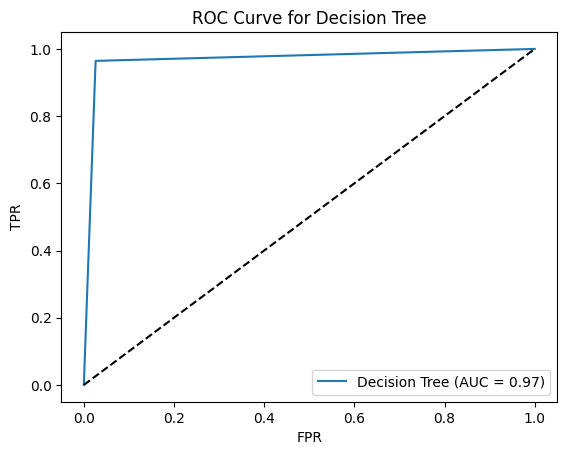


Evaluating Random Forest
Random Forest Mean CV Accuracy: 0.98
Random Forest Accuracy: 0.97
Random Forest ROC AUC: 0.9714
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       765
           1       0.97      0.96      0.97       506

    accuracy                           0.97      1271
   macro avg       0.97      0.97      0.97      1271
weighted avg       0.97      0.97      0.97      1271



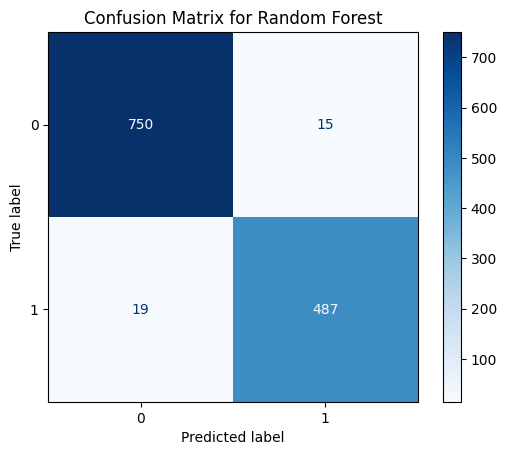

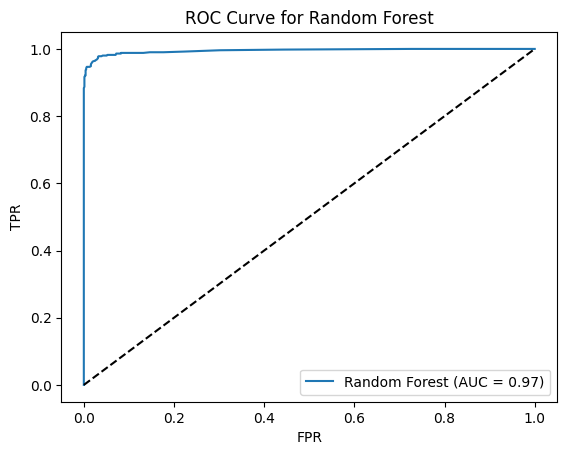


Evaluating Support Vector Machine
Support Vector Machine Mean CV Accuracy: 0.94
Support Vector Machine Accuracy: 0.92
Support Vector Machine ROC AUC: 0.9192
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       765
           1       0.90      0.91      0.90       506

    accuracy                           0.92      1271
   macro avg       0.92      0.92      0.92      1271
weighted avg       0.92      0.92      0.92      1271



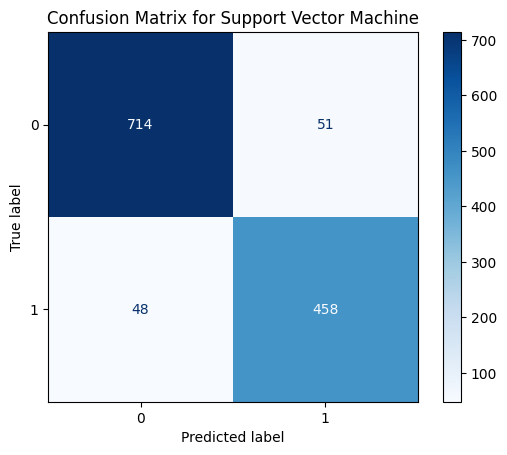

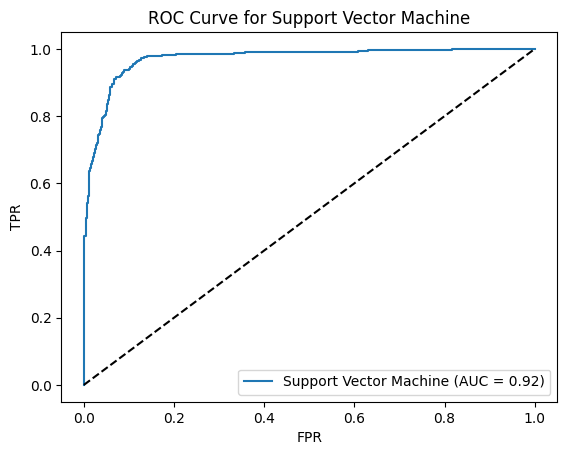


Evaluating K-Nearest Neighbors
K-Nearest Neighbors Mean CV Accuracy: 0.89
K-Nearest Neighbors Accuracy: 0.88
K-Nearest Neighbors ROC AUC: 0.8690
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       765
           1       0.85      0.84      0.84       506

    accuracy                           0.88      1271
   macro avg       0.87      0.87      0.87      1271
weighted avg       0.88      0.88      0.88      1271



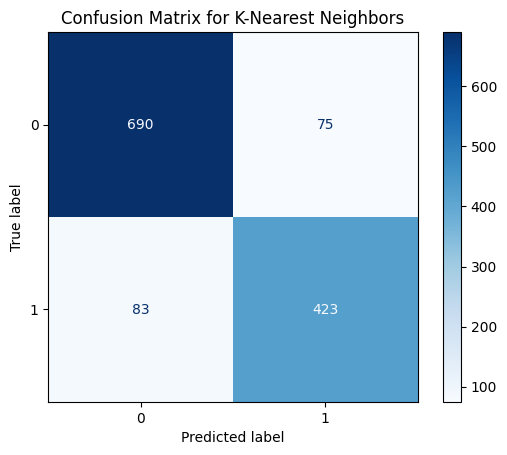

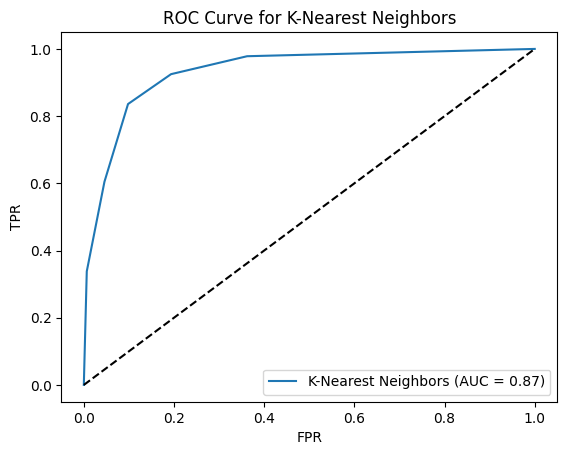

In [32]:
# Machine Learning Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, ConfusionMatrixDisplay)

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
    X = pd.concat([X, dummies], axis=1)
    X.drop(col, axis=1, inplace=True)

# Encode target
y = LabelEncoder().fit_transform(y)

# Standardize
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\nEvaluating {name}")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Mean CV Accuracy: {scores.mean():.2f}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()



        PC1       PC2
0  1.969209 -2.607891
1 -1.268855 -0.093587
2  2.336827 -0.095280
3  1.589573  1.461805
4  1.593144  0.067508
Explained variance ratio: [0.68419047 0.14801895]


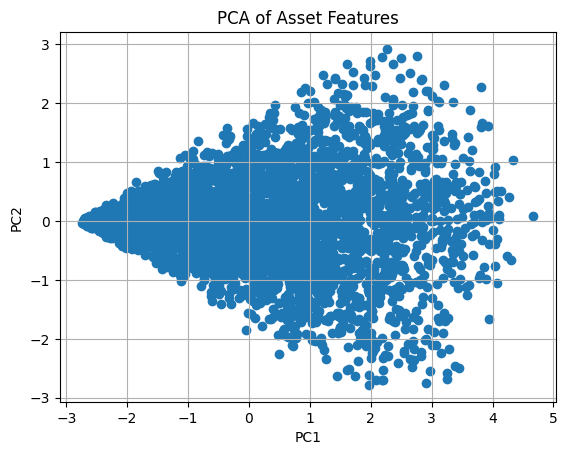

In [33]:
# PCA
from sklearn.decomposition import PCA

X_pca = df.iloc[:, 8:12]  # columns 9–12
X_scaled_pca = StandardScaler().fit_transform(X_pca)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled_pca)
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
print(pca_df.head())
print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA of Asset Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()